In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv("C:/Users/mncedisi.mncwabe/Documents/Practices/iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# drop id column
iris = iris.drop('Id',axis=1)

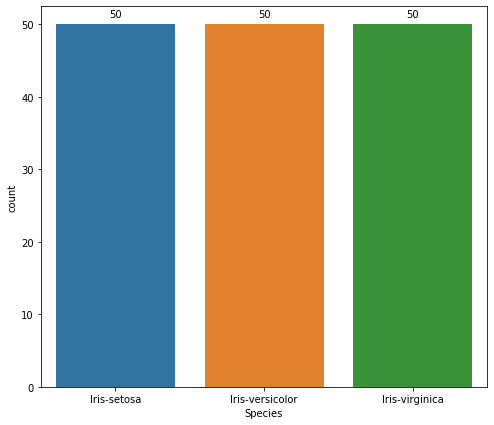

In [16]:
# check count of eachflower category
plt.figure(figsize=(8,7))
plot = sns.countplot(x='Species',data=iris)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',
                  xytext = (0, 10), textcoords = 'offset points')

In [17]:
# equal number for each flower species

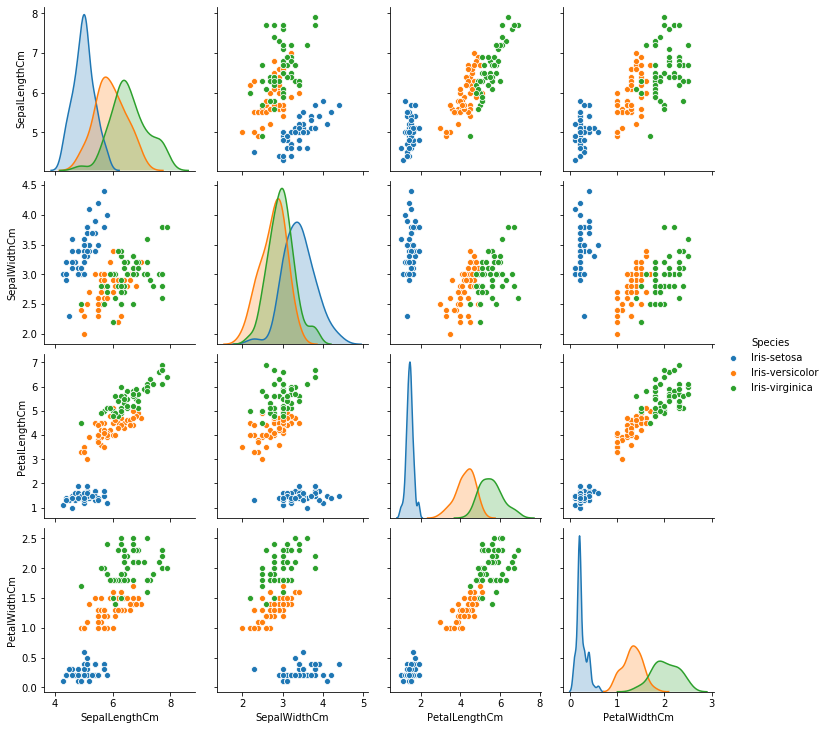

In [18]:
sns.pairplot(iris,hue='Species')

In [22]:
# From the pairplot above, it is clear that the relationship between pairs of features of
# iris-setosa (in blue) is distinctly different from the other two species.
# There is some overlap in the pairwise relationships of the other two species,
# iris-versicolor (brown) and iris-virginica (green).

In [34]:
# Now, when we train any algorithm, the number of features and their correlation plays an important role. 
# If there are features and many of the features are highly correlated, 
# then training an algorithm with all the featues will reduce the accuracy. 
# Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

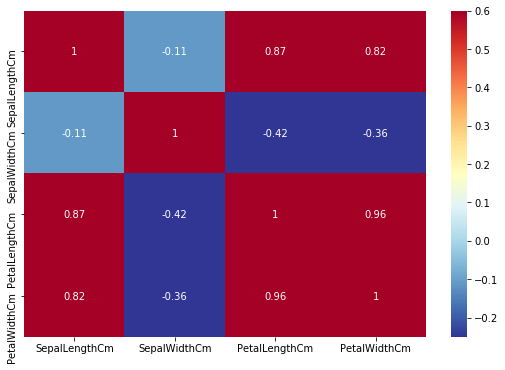

In [20]:
plt.figure(figsize =(9,6))
sns.heatmap(iris.corr(),cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

In [21]:
# very strong correlation between PetalLength and PetalWidth
# also strong correlation between PetalLenghh and SepalWidht


# The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated
# We will use all the features for training the algorithm and check the accuracy.
# Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we
# are using only 2 features that are not correlated. 
# Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

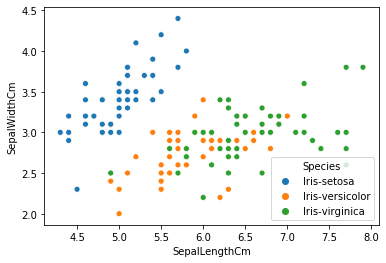

In [25]:
# visualize Sepal Lenth VS Sepal Width
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species')

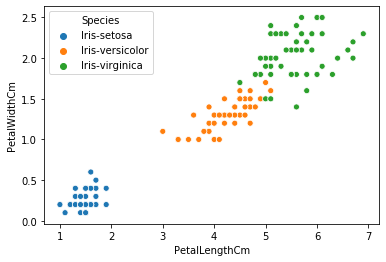

In [26]:
# visualize Petal Lenth VS Sepal Petal Width
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species')

In [28]:
# AS seen from the Heatmap, there's a very strong corellation between Sepal Lenth and Width
# And Petal Length and Width

# As we can see that the Petal Features are giving a better cluster division compared to the Sepal features.
# This is an indication that the Petals can help in better and accurate Predictions over the Sepal. Will check later

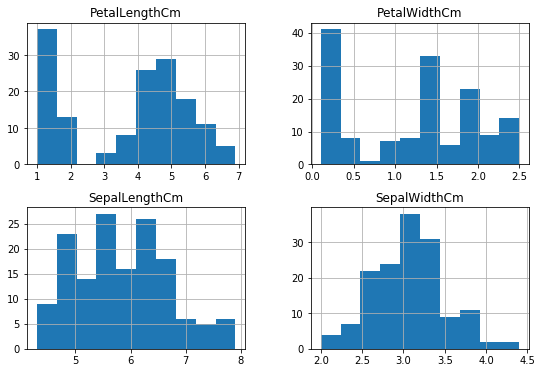

In [32]:
# check distribution

iris.hist(figsize=(9,6));

In [33]:
iris.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [43]:
from sklearn import preprocessing


#Classification Algorithms 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, plot_confusion_matrix

In [36]:
X = iris.drop('Species',axis=1)
y = iris['Species']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=10)

In [48]:
# KNN - KNearestNeighbors

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_pred,y_test)*100

97.77777777777777

In [50]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
metrics.accuracy_score(y_pred,y_test)*100

97.77777777777777

In [42]:
# Logistic Regression

lm = LogisticRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)*100

100.0

In [56]:
# CV for KNN
rf_cv = cross_val_score(knn, X_train, y_train, cv = 10)
rf_cv.mean()*100

96.27272727272727